In [1]:
!pip uninstall -y numpy scikit-learn
!pip install scikit-learn

Found existing installation: numpy 2.3.2
Uninstalling numpy-2.3.2:
  Successfully uninstalled numpy-2.3.2
Found existing installation: scikit-learn 1.7.1
Uninstalling scikit-learn-1.7.1:
  Successfully uninstalled scikit-learn-1.7.1
  Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (11 kB)
  Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
Using cached scikit_learn-1.7.1-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (9.7 MB)
Using cached numpy-2.3.2-cp311-cp311-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (16.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version 

In [1]:
!pip install pandas openpyxl xlrd

In [2]:
from google.colab import files
import pandas as pd

# Upload file from your computer
uploaded = files.upload()

# Get the filename (replace 'your_file.xlsx' with your actual filename)
file_name = list(uploaded.keys())[0]

# Read the Excel file using pandas
df = pd.read_excel(file_name, engine='openpyxl')  # For .xlsx files
# OR
# df = pd.read_excel(file_name, engine='xlrd')    # For .xls files

# Display the data
print(df.head())

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility (1).xlsx
   Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)   \
0       1                 1           0          28         44.6        152.0   
1       2                 2           0          36         65.0        161.5   
2       3                 3           1          33         68.8        165.0   
3       4                 4           0          37         65.0        148.0   
4       5                 5           0          25         52.0        161.0   

    BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  ...  \
0  19.3           15                78                22  ...   
1   NaN           15                74                20  ...   
2   NaN           11                72                18  ...   
3   NaN           13                72                20  ...   
4   NaN           11                72                18  ...   

   Fast food (Y/N)  Reg.Exercise(Y/N) 

In [3]:
df.head()  # Shows first 5 rows

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
# Display missing values BEFORE handling
print("Missing values BEFORE replacement:")
print(df.isnull().sum())

Missing values BEFORE replacement:
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin 

In [5]:
# Replace missing values with mean (for numerical columns only)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    if df[col].isnull().any():  # Check if column has missing values
        mean_val = df[col].mean()
        df[col].fillna(mean_val, inplace=True)

/tmp/ipython-input-631306973.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [6]:
# Display missing values AFTER handling
print("\nMissing values AFTER replacement:")
print(df.isnull().sum())


Missing values AFTER replacement:
Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       0
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin 

In [7]:
# Show the first 5 rows of the cleaned DataFrame
print("\nCleaned DataFrame:")
display(df.head())


Cleaned DataFrame:


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,23.929752,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,23.929752,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,23.929752,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,23.929752,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [8]:
from scipy import stats
import numpy as np # Import numpy with the alias np

# Select numerical columns (exclude categorical/text columns)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate Z-Scores for numerical columns
z_scores = np.abs(stats.zscore(df[numerical_cols]))

# Identify outliers (rows where ANY numerical column has |Z-Score| > 3)
outliers_z = (z_scores > 3).any(axis=1)
outlier_rows_z = df[outliers_z]

print(f"Number of outliers (Z-Score > 3): {len(outlier_rows_z)}")
print("Outlier rows (Z-Score method):")
display(outlier_rows_z)

Number of outliers (Z-Score > 3): 128
Outlier rows (Z-Score method):


,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
3,4,4,0,37,65.0,148.000,23.929752,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
5,6,6,0,36,74.1,165.000,23.929752,15,78,28,...,0.0,0,110,70,9,6,16.0,20.0,8.0,NaN
15,16,16,0,38,80.5,154.000,23.929752,13,78,22,...,0.0,0,120,80,1,3,14.0,20.0,3.9,NaN
18,19,19,0,31,52.4,159.000,23.929752,17,72,18,...,0.0,0,120,80,0,2,0.0,17.0,5.6,NaN
26,27,27,1,30,76.0,160.000,23.929752,15,75,18,...,1.0,1,120,80,21,20,11.0,12.0,6.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,522,522,0,40,78.0,155.000,32.500000,15,74,20,...,0.0,0,120,80,8,10,19.0,21.0,8.0,NaN
525,526,526,0,27,48.0,158.496,19.100000,13,72,18,...,0.0,0,110,70,2,3,16.0,19.0,7.8,NaN
535,536,536,0,26,80.0,161.544,30.700000,18,70,18,...,0.0,0,110,80,7,9,13.0,17.5,9.6,NaN
538,539,539,0,36,54.0,152.000,23.400000,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN


In [9]:
# Select numerical columns (exclude categorical/text)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Discretize into 5 bins (adjust as needed)
df_discretized = df.copy()
for col in numerical_cols:
    df_discretized[f'{col}_bin'] = pd.cut(df[col], bins=5, labels=False)  # Equal-width bins
    # For equal-frequency bins, use: pd.qcut(df[col], q=5, labels=False)

# Drop original numerical columns (optional)
df_discretized.drop(numerical_cols, axis=1, inplace=True)

print("Discretized Data:")
display(df_discretized.head())

Discretized Data:


,II beta-HCG(mIU/mL),AMH(ng/mL),Unnamed: 44,Sl. No_bin,Patient File No._bin,PCOS (Y/N)_bin,Age (yrs)_bin,Weight (Kg)_bin,Height(Cm) _bin,BMI_bin,...,Pimples(Y/N)_bin,Fast food (Y/N)_bin,Reg.Exercise(Y/N)_bin,BP _Systolic (mmHg)_bin,BP _Diastolic (mmHg)_bin,Follicle No. (L)_bin,Follicle No. (R)_bin,Avg. F size (L) (mm)_bin,Avg. F size (R) (mm)_bin,Endometrium (mm)_bin
0,1.99,2.07,NaN,0,0,0,1,0,1,0,...,0,4,0,3,3,0,0,3,3,2
1,1.99,1.53,NaN,0,0,0,2,2,2,1,...,0,0,0,4,3,0,1,3,2,1
2,494.08,6.63,NaN,0,0,4,2,2,3,1,...,4,4,0,4,3,2,3,3,4,2
3,1.99,1.22,NaN,0,0,0,3,2,1,1,...,0,0,0,4,3,0,0,3,2,2
4,801.45,2.26,NaN,0,0,0,0,1,2,1,...,0,0,0,4,3,0,0,3,2,1



Explained Variance Ratio: [0.10883582 0.07402   ]

Data after PCA:


,PC1,PC2
0,-2.578846,0.007006
1,-2.036182,2.374421
2,2.062197,0.355890
3,-1.953362,2.988356
4,-2.206783,1.034035


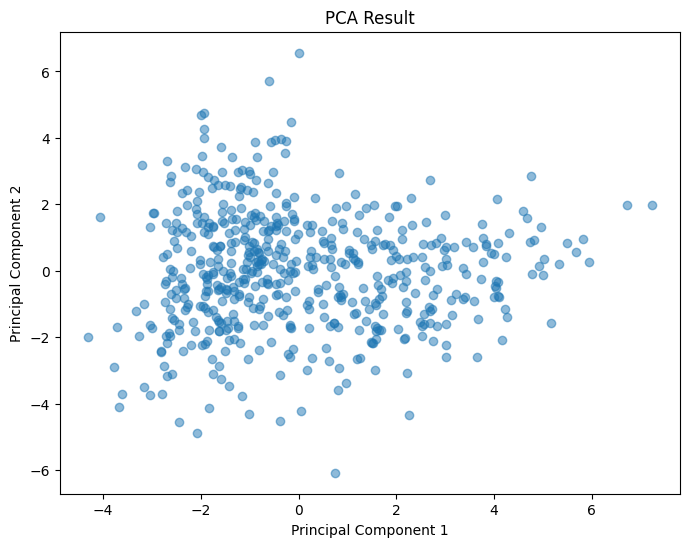

In [10]:
!pip install scikit-learn
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler # Import StandardScaler from sklearn.preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Standardize the original numerical data (before discretization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_cols])

# Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)
print("\nData after PCA:")
display(df_pca.head())

# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()


Reduced Data (from 541 rows to 50 centroids):


,PC1,PC2
0,2.342559,1.870164
1,0.766954,-1.018325
2,-0.882532,0.398758
3,-3.055926,-3.532010
4,-1.792097,1.862269


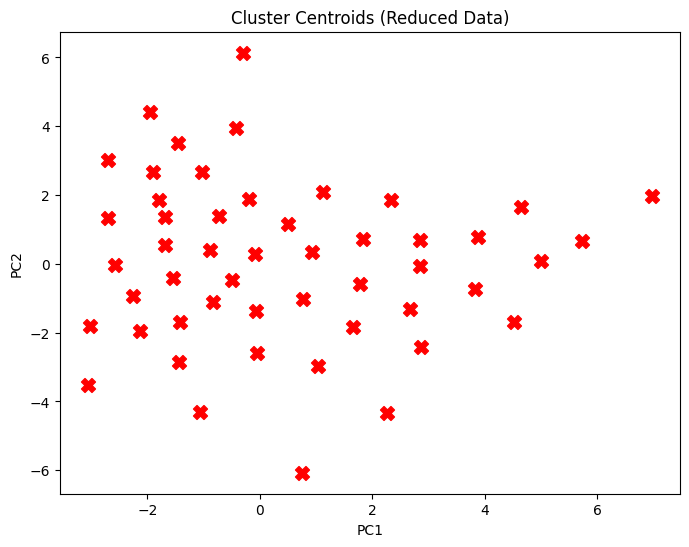

In [11]:
# Cluster the PCA-transformed data
n_clusters = 50  # Adjust based on your dataset size
from sklearn.cluster import KMeans # Import the KMeans class from sklearn.cluster
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_pca)

# Replace the dataset with cluster centroids
centroids = kmeans.cluster_centers_
df_reduced = pd.DataFrame(centroids, columns=['PC1', 'PC2'])

print(f"\nReduced Data (from {len(df)} rows to {len(df_reduced)} centroids):")
display(df_reduced.head())

# Plot centroids
plt.figure(figsize=(8, 6))
plt.scatter(df_reduced['PC1'], df_reduced['PC2'], c='red', marker='X', s=100)
plt.title('Cluster Centroids (Reduced Data)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [12]:
# Step 2: Check number of duplicates before removal
print(f"Number of duplicates BEFORE removal: {df.duplicated().sum()}")

Number of duplicates BEFORE removal: 0


In [13]:
X = df.drop(columns=['PCOS (Y/N)'])
y = df['PCOS (Y/N)']

In [14]:
# Check non-numeric columns in X
non_numeric = X.select_dtypes(include=['object', 'category']).columns
print("Non-numeric columns:", non_numeric.tolist())

Non-numeric columns: ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Unnamed: 44']


In [15]:
# Clean numeric columns
for col in X.columns:
    X[col] = pd.to_numeric(X[col], errors='coerce')  # Fixes '1.99.' → 1.99

# Check NaN values introduced
print("\nMissing values after cleaning:")
print(X.isnull().sum())


Missing values after cleaning:
Sl. No                      0
Patient File No.            0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       0
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      1
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  1
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair los

In [16]:
# Fill NaN with median (robust to outliers)
X.fillna(X.median(), inplace=True)

In [17]:
print("\nData types after cleaning:")
print(X.dtypes)


Data types after cleaning:
Sl. No                      int64
Patient File No.            int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)          

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif

# Initialize and fit SelectKBest
k_best = SelectKBest(score_func=f_classif, k='all')
k_best.fit(X, y)  # Now works!

# Get feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'ANOVA_F_Score': k_best.scores_
}).sort_values(by='ANOVA_F_Score', ascending=False)

print("\nFeature Scores (ANOVA F-value):")
display(feature_scores)


Feature Scores (ANOVA F-value):


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [43] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,ANOVA_F_Score
39,Follicle No. (R),390.835930
38,Follicle No. (L),308.519697
31,Skin darkening (Y/N),157.672178
30,hair growth(Y/N),148.425534
29,Weight gain(Y/N),130.168448
10,Cycle(R/I),103.674828
34,Fast food (Y/N),89.721510
33,Pimples(Y/N),48.043566
24,AMH(ng/mL),40.426840
3,Weight (Kg),25.349272


In [19]:
# Select top 23 features
top_23_features = feature_scores.head(23)['Feature'].tolist()

# Create new DataFrame with selected features
new_df = X[top_23_features]



In [ ]:
print("\nTop 23 Features:")
display(new_df.head())


Top 23 Features:


,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),...,Waist(inch),Hip(inch),BMI,Avg. F size (L) (mm),Marraige Status (Yrs),Endometrium (mm),Avg. F size (R) (mm),Pulse rate(bpm),Hb(g/dl),Vit D3 (ng/mL)
0,3,3,0,0,0,2,1.0,0,2.07,44.6,...,30,36,19.300000,18.0,7.0,8.5,18.0,78,10.48,17.1
1,5,3,0,0,0,2,0.0,0,1.53,65.0,...,32,38,23.929752,15.0,11.0,3.7,14.0,74,11.70,61.3
2,15,13,0,0,0,2,1.0,1,6.63,68.8,...,36,40,23.929752,18.0,10.0,10.0,20.0,72,11.80,49.7
3,2,2,0,0,0,2,0.0,0,1.22,65.0,...,36,42,23.929752,15.0,4.0,7.5,14.0,72,12.00,33.4
4,4,3,0,0,0,2,0.0,0,2.26,52.0,...,30,37,23.929752,16.0,1.0,7.0,14.0,72,10.00,43.8


In [20]:
X = new_df  # new_df already contains the 23 selected features
# Target (y) comes from the original DataFrame
y = df['PCOS (Y/N)']

# Display original data
print("Original Data (First 5 rows):")
display(X.head())

Original Data (First 5 rows):


,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),...,Waist(inch),Hip(inch),BMI,Avg. F size (L) (mm),Marraige Status (Yrs),Endometrium (mm),Avg. F size (R) (mm),Pulse rate(bpm),Hb(g/dl),Vit D3 (ng/mL)
0,3,3,0,0,0,2,1.0,0,2.07,44.6,...,30,36,19.300000,18.0,7.0,8.5,18.0,78,10.48,17.1
1,5,3,0,0,0,2,0.0,0,1.53,65.0,...,32,38,23.929752,15.0,11.0,3.7,14.0,74,11.70,61.3
2,15,13,0,0,0,2,1.0,1,6.63,68.8,...,36,40,23.929752,18.0,10.0,10.0,20.0,72,11.80,49.7
3,2,2,0,0,0,2,0.0,0,1.22,65.0,...,36,42,23.929752,15.0,4.0,7.5,14.0,72,12.00,33.4
4,4,3,0,0,0,2,0.0,0,2.26,52.0,...,30,37,23.929752,16.0,1.0,7.0,14.0,72,10.00,43.8


In [21]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [22]:
# Initialize StandardScaler
scaler = StandardScaler()

# Before applying StandardScaler, clean the data:

# Clean numeric columns by removing non-numeric characters and converting to numeric
for col in X.columns:
    # Replace any non-digit or decimal point characters with an empty string
    X[col] = X[col].astype(str).str.replace('[^0-9.]', '', regex=True)
    # Convert the cleaned strings to numeric, coercing errors to NaN
    X[col] = pd.to_numeric(X[col], errors='coerce')

# Fill NaN values (introduced by the cleaning) with the column median
X.fillna(X.median(), inplace=True)

# Fit the scaler to the features and transform
X_scaled = scaler.fit_transform(X)

# Convert scaled array back to DataFrame (for readability)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display standardized data
print("\nStandardized Data (Mean = 0, Std = 1):")
display(X_scaled_df.head())

# Verify mean and standard deviation
print("\nVerification:")
print("Mean of scaled features:", X_scaled_df.mean().values)
print("Std of scaled features:", X_scaled_df.std().values)

# Optional: Combine scaled features with target
df_scaled = pd.concat([X_scaled_df, y], axis=1)


Standardized Data (Mean = 0, Std = 1):


,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),...,Waist(inch),Hip(inch),BMI,Avg. F size (L) (mm),Marraige Status (Yrs),Endometrium (mm),Avg. F size (R) (mm),Pulse rate(bpm),Hb(g/dl),Vit D3 (ng/mL)
0,-0.821471,-0.740617,-0.665332,-0.61367,-0.778037,-0.621534,0.971695,-0.979870,-0.604743,-1.364770,...,-1.068864,-0.502644,-1.893608,0.836776,-0.142009,0.011133,0.768537,1.073680,-0.785169,-0.094875
1,-0.370287,-0.740617,-0.665332,-0.61367,-0.778037,-0.621534,-1.031035,-0.979870,-0.696716,0.486731,...,-0.512314,0.001865,0.000000,-0.005083,0.692202,-2.207618,-0.437816,0.169968,0.623440,0.032913
2,1.885630,1.626032,-0.665332,-0.61367,-0.778037,-0.621534,0.971695,1.020544,0.171915,0.831618,...,0.600786,0.506374,0.000000,0.836776,0.483650,0.704493,1.371714,-0.281888,0.738900,-0.000624
3,-1.047063,-0.977282,-0.665332,-0.61367,-0.778037,-0.621534,-1.031035,-0.979870,-0.749515,0.486731,...,0.600786,1.010883,0.000000,-0.005083,-0.767668,-0.451107,-0.437816,-0.281888,0.969819,-0.047749
4,-0.595879,-0.740617,-0.665332,-0.61367,-0.778037,-0.621534,-1.031035,-0.979870,-0.572382,-0.693147,...,-1.068864,-0.250389,0.000000,0.275536,-1.393326,-0.682227,-0.437816,-0.281888,-1.339375,-0.017682



Verification:
Mean of scaled features: [-9.52206069e-17 -7.22363225e-17 -2.29842844e-17 -7.22363225e-17
  1.31338768e-17 -2.72527944e-16  0.00000000e+00  2.62677536e-17
  3.94016304e-17 -7.02662410e-16 -7.88032609e-17  1.31338768e-17
 -1.60889991e-16  6.89528533e-16  6.82961594e-16 -2.21634171e-16
 -1.18204891e-16 -1.11637953e-16  6.43559964e-16  3.41480797e-16
  9.85040761e-18 -5.51622826e-16 -6.56693841e-18]
Std of scaled features: [1.0009255 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255
 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255
 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255 1.0009255
 1.0009255 1.0009255]


In [23]:
from sklearn.model_selection import train_test_split # Import train_test_split

# Split into training (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42  # For reproducibility
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 432 samples
Test set size: 109 samples


In [24]:
# Standardize features (required for LR, MLP, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
# Initialize all classifiers
lr = LogisticRegression(random_state=9, max_iter=1000)
dtc = DecisionTreeClassifier(random_state=9)
adaboost = AdaBoostClassifier(random_state=9)
gnb = GaussianNB()
mlp = MLPClassifier(random_state=9, max_iter=1000)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=9, eval_metric='logloss')
# Added classifiers
sgd = SGDClassifier(random_state=9, max_iter=1000, loss='log_loss')          # SGD Classifier
gb = GradientBoostingClassifier(random_state=9, n_estimators=100, learning_rate=0.1)  # Gradient Boosting


In [27]:
# List of models for Voting Classifier (assign weights)
estimators = [
    ('lr', lr),
    ('dtc', dtc),
    ('adaboost', adaboost),
    ('gnb', gnb),
    ('mlp', mlp),
    ('knn', knn),
    ('xgb', xgb),
    ('sgd', sgd),
    ('gb', gb)
]

In [28]:
# Weighted Voting Classifier (adjust weights as needed)
weights = [3, 5, 6, 3, 4, 5, 6, 6, 6]  # Example weights (sum not required to be 1) [2, 1, 3, 1, 2, 1, 4]
voting_clf = VotingClassifier(
    estimators=estimators,
    voting='soft',  # Use 'soft' for probability-based voting
    weights=weights
)

In [29]:
# Train and evaluate individual models
models = {
    "Logistic Regression": lr,
    "Decision Tree": dtc,
    "AdaBoost": adaboost,
    "Gaussian Naive Bayes": gnb,
    "MLP": mlp,
    "KNeighbors": knn,
    "XGBoost": xgb,
    "SGD Classifier": sgd,           # Added SGD
    "Gradient Boosting": gb,         # Added Gradient Boosting
    "Weighted Voting": voting_clf
}

In [30]:
for name, model in models.items():
    if name in ['Logistic Regression', 'MLP', 'KNeighbors']:
        # Use scaled data for models requiring standardization
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        # Use raw data for tree-based models and Naive Bayes
        model.fit(X_train, y_train)
        # Convert X_test to a contiguous array before prediction
        y_pred = model.predict(np.ascontiguousarray(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Test Accuracy: {accuracy:.4f}")

# Cross-validation for Voting Classifier (using scaled data)
# Convert X_train_scaled to a contiguous array before cross-validation
cv_scores = cross_val_score(voting_clf, np.ascontiguousarray(X_train_scaled), y_train, cv=5, scoring='accuracy')
print(f"\nVoting Classifier CV Mean Accuracy: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

Logistic Regression Test Accuracy: 0.8716
Decision Tree Test Accuracy: 0.8440


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


AdaBoost Test Accuracy: 0.8716
Gaussian Naive Bayes Test Accuracy: 0.8716
MLP Test Accuracy: 0.8624
KNeighbors Test Accuracy: 0.8807
XGBoost Test Accuracy: 0.8807
SGD Classifier Test Accuracy: 0.7890


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


Gradient Boosting Test Accuracy: 0.8807


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python

Weighted Voting Test Accuracy: 0.8716

Voting Classifier CV Mean Accuracy: 0.8981 (±0.0250)


In [31]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Assuming models are already trained (from previous code)
models = {
    "Logistic Regression": lr,
    "Decision Tree": dtc,
    "AdaBoost": adaboost,
    "Gaussian Naive Bayes": gnb,
    "MLP": mlp,
    "KNeighbors": knn,
    "XGBoost": xgb,
    "SGD Classifier": sgd,           # Added SGD
    "Gradient Boosting": gb,
    "Weighted Voting": voting_clf
}

# Initialize DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Precision', 'Recall (Sensitivity)', 'F1 Score', 'AUC'])

for name, model in models.items():
    # Determine if scaled data is needed
    if name in ['Logistic Regression', 'MLP', 'KNeighbors']:
        X_test_used = X_test_scaled  # Use scaled data
    else:
        X_test_used = X_test  # Use raw data

    # Convert X_test_used to a NumPy array if it's a DataFrame
    if isinstance(X_test_used, pd.DataFrame):
        X_test_used = X_test_used.to_numpy()

    # Generate predictions and probabilities
    y_pred = model.predict(X_test_used)

    # Convert X_test_used to a NumPy array if it's a DataFrame
    if isinstance(X_test_used, pd.DataFrame):
        X_test_used = X_test_used.to_numpy()

    y_proba = model.predict_proba(X_test_used)[:, 1]  # Probabilities for class 1

    # Calculate metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # With this line:
    results.loc[len(results)] = {
        'Model': name,
        'Precision': round(precision, 4),
        'Recall (Sensitivity)': round(recall, 4),
        'F1 Score': round(f1, 4),
        'AUC': round(auc, 4)
    }

# Display results sorted by AUC
print(results.sort_values(by='AUC', ascending=False))

                  Model  Precision  Recall (Sensitivity)  F1 Score     AUC
3  Gaussian Naive Bayes     0.8750                0.6562    0.7500  0.9517
2              AdaBoost     0.8214                0.7188    0.7667  0.9448
9       Weighted Voting     0.8214                0.7188    0.7667  0.9399
0   Logistic Regression     0.8214                0.7188    0.7667  0.9334
8     Gradient Boosting     0.8065                0.7812    0.7937  0.9269
6               XGBoost     0.8065                0.7812    0.7937  0.9205
4                   MLP     0.7931                0.7188    0.7541  0.9067
5            KNeighbors     0.8800                0.6875    0.7719  0.9052
1         Decision Tree     0.7027                0.8125    0.7536  0.8348
7        SGD Classifier     0.8462                0.3438    0.4889  0.6546


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-

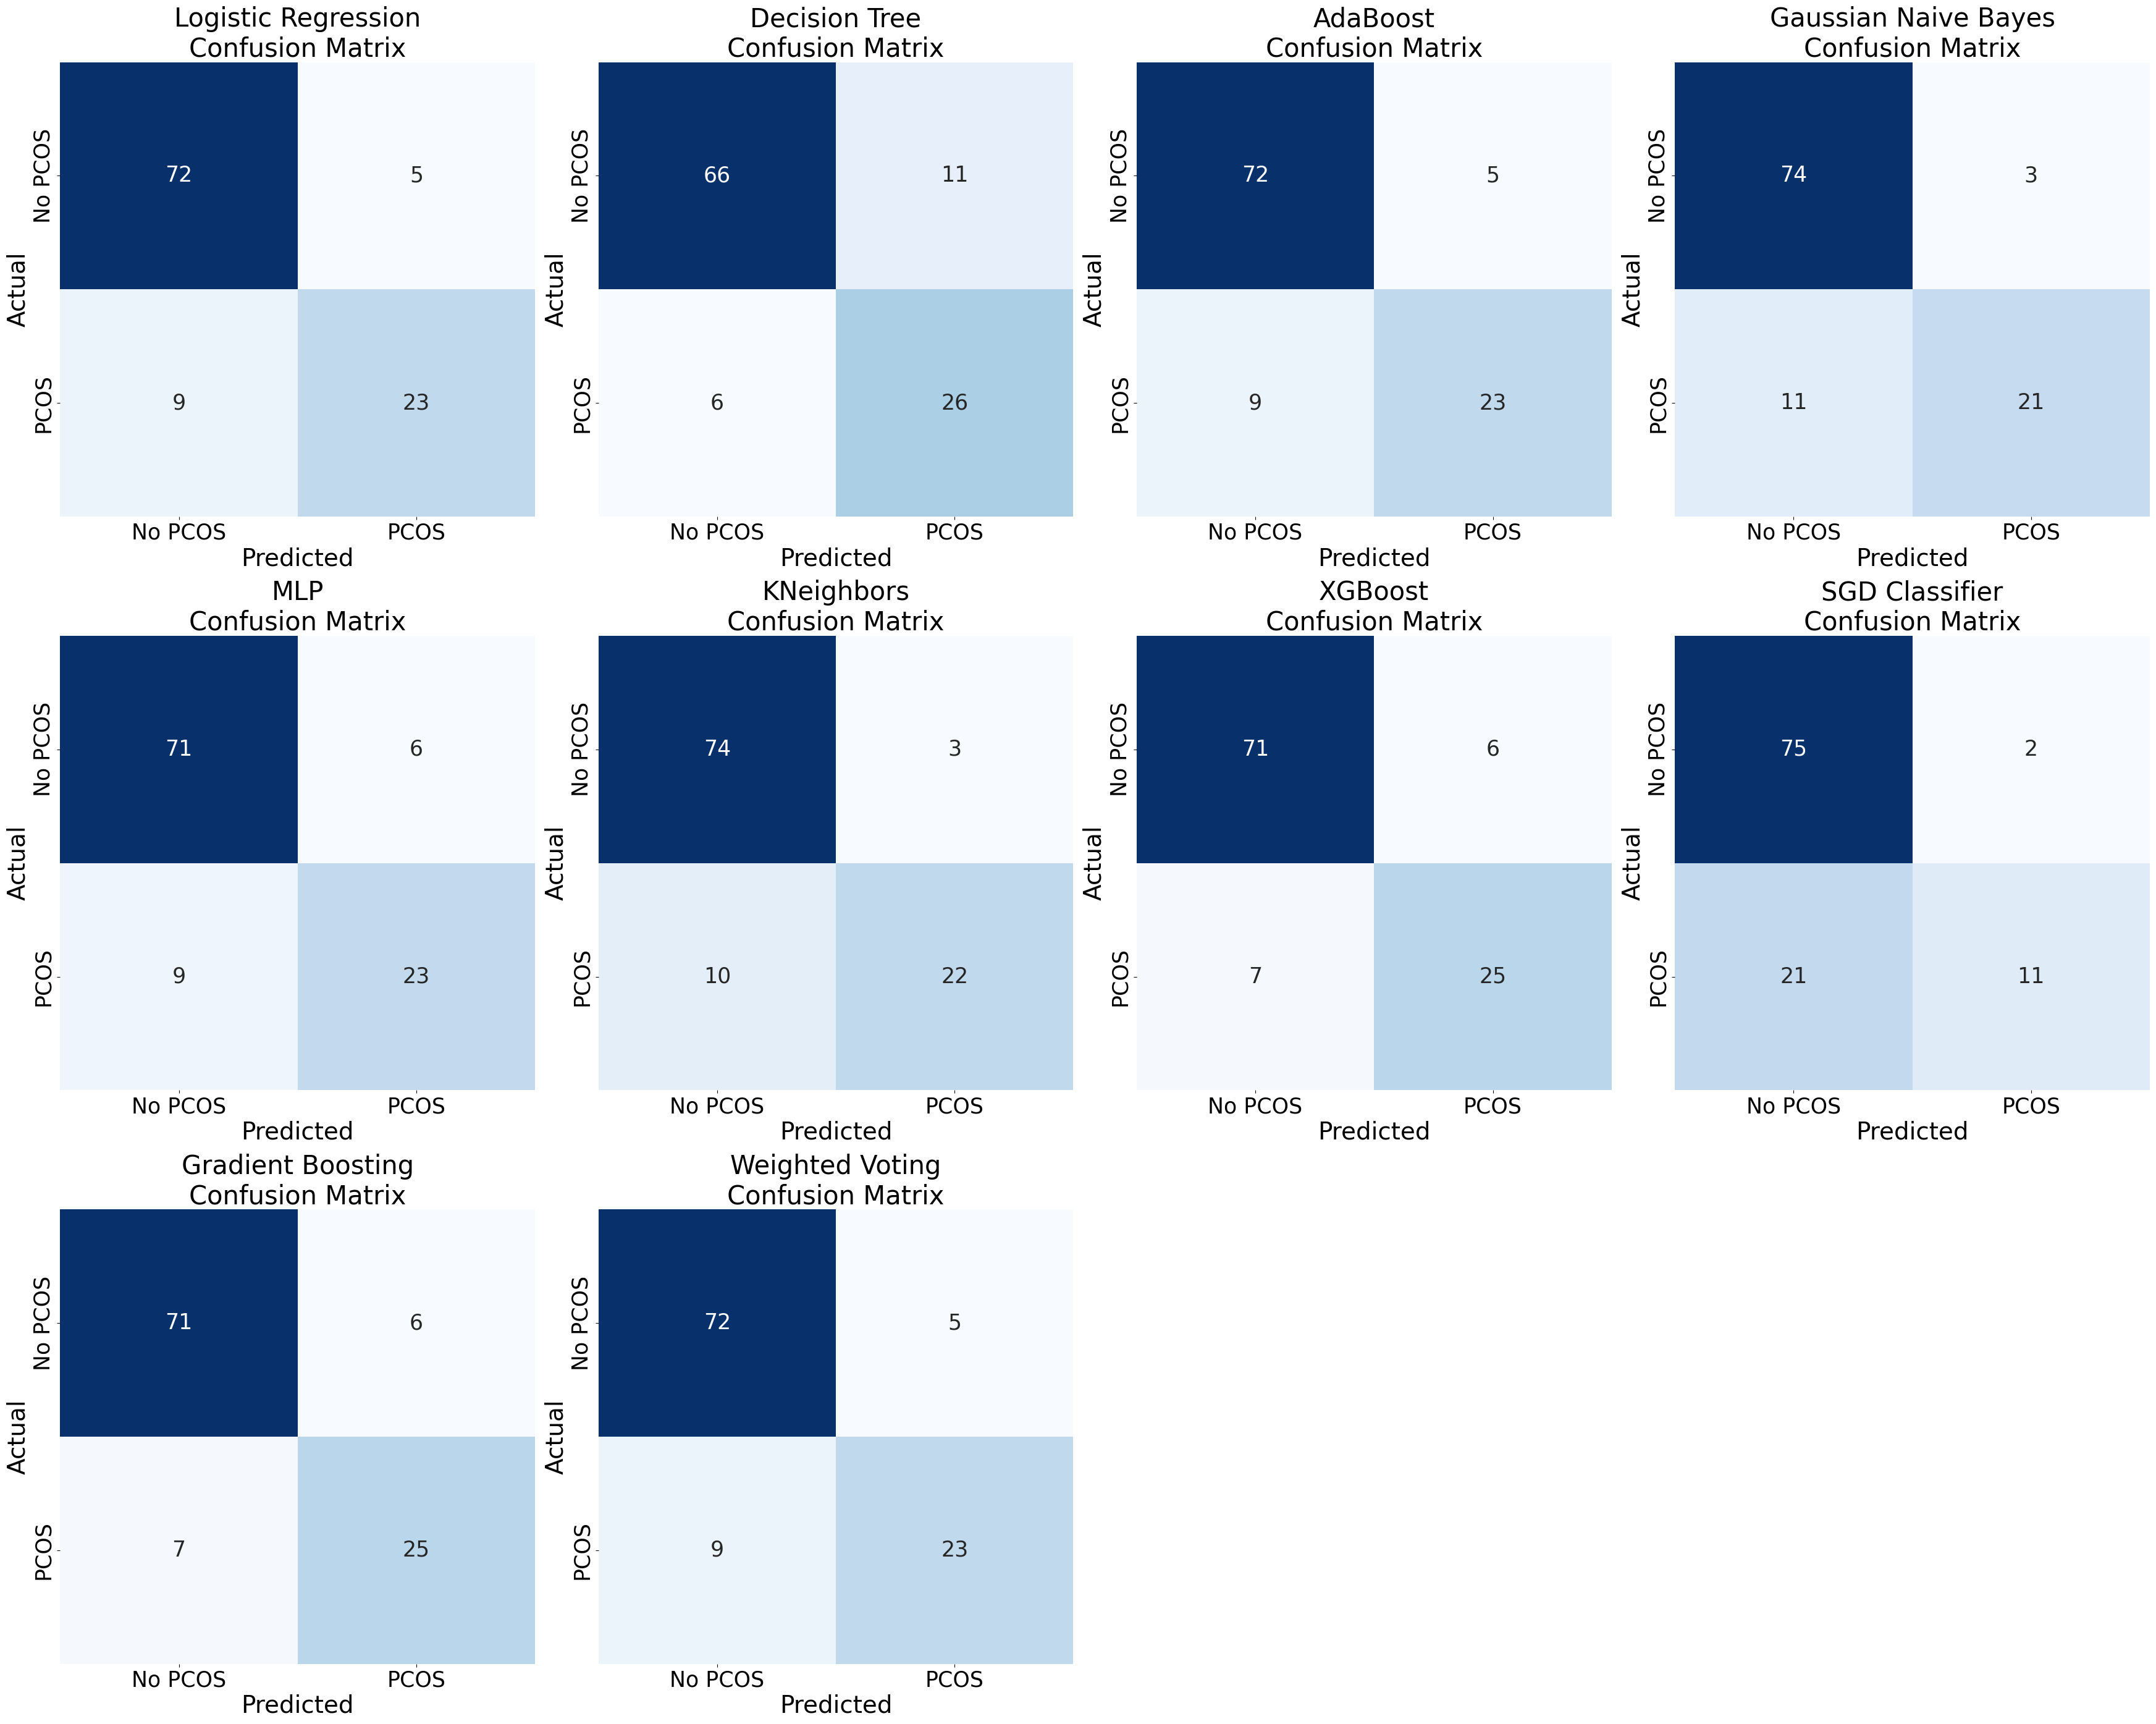

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

# List of classifiers (use your trained models)
models = {
    "Logistic Regression": lr,
    "Decision Tree": dtc,
    "AdaBoost": adaboost,
    "Gaussian Naive Bayes": gnb,
    "MLP": mlp,
    "KNeighbors": knn,
    "XGBoost": xgb,
    "SGD Classifier": sgd,           # Added SGD
    "Gradient Boosting": gb,
    "Weighted Voting": voting_clf
}

# Create a 2x4 grid for confusion matrices
fig, axes = plt.subplots(3, 4, figsize=(35, 28))
axes = axes.ravel()  # Flatten the axes array

for i, (name, model) in enumerate(models.items()):
    ax = axes[i]

    # Determine if scaled data is needed
    if name in ['Logistic Regression', 'MLP', 'KNeighbors']:
        X_test_used = X_test_scaled
    else:
        X_test_used = X_test

     # Convert X_test_used to a contiguous array before prediction
    X_test_used = np.ascontiguousarray(X_test_used)
    # Predictions
    y_pred = model.predict(X_test_used)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot using Seaborn
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax,
                annot_kws={"size": 25}, cbar=False)
    ax.set_title(f"{name}\nConfusion Matrix", fontsize=30)
    ax.set_xlabel("Predicted", fontsize=28)
    ax.set_ylabel("Actual", fontsize=28)
    ax.set_xticklabels(['No PCOS', 'PCOS'], fontsize=25)
    ax.set_yticklabels(['No PCOS', 'PCOS'], fontsize=25)

# Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature 

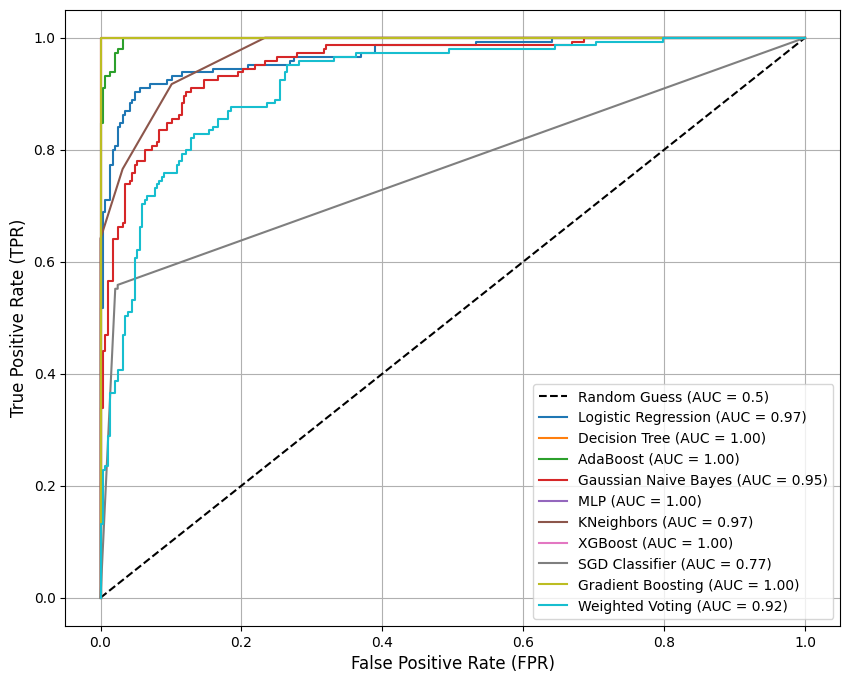

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize figure for training data ROC
plt.figure(figsize=(10, 8))
#plt.title('ROC Curves (Training Data)', fontsize=14)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

# Plot ROC for each model on training data
for name, model in models.items():
    # Determine if scaled data is needed
    if name in ['Logistic Regression', 'MLP', 'KNeighbors', 'Weighted Voting']:
        X_data = X_train_scaled
    else:
        X_data = X_train

    # Get predicted probabilities for class "1" (PCOS)
    y_proba_train = model.predict_proba(X_data)[:, 1]

    # Compute ROC curve and AUC
    fpr_train, tpr_train, _ = roc_curve(y_train, y_proba_train)
    auc_train = auc(fpr_train, tpr_train)

    # Plot
    plt.plot(fpr_train, tpr_train,
             label=f'{name} (AUC = {auc_train:.2f})')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature 

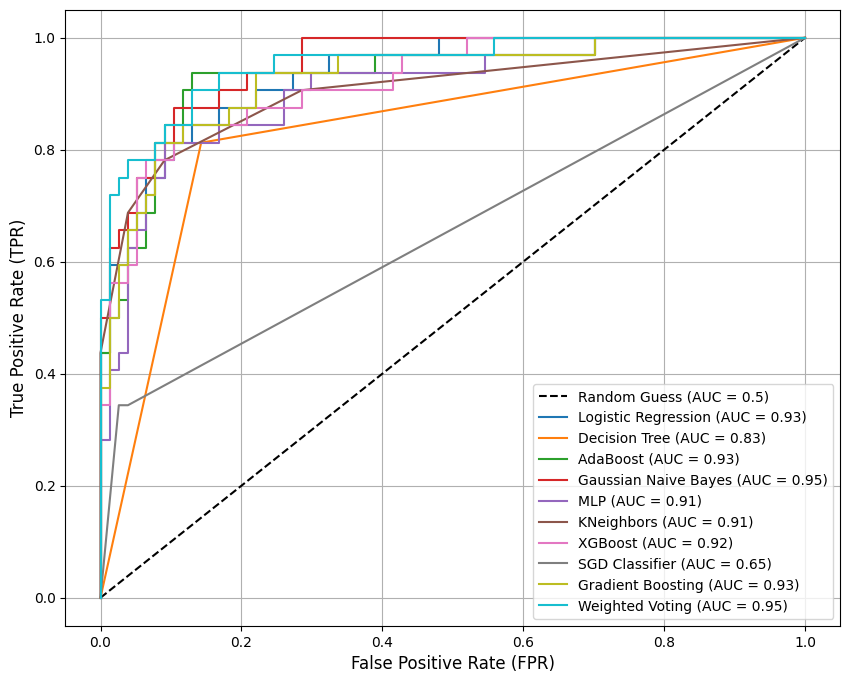

In [ ]:
# Initialize figure for test data ROC
plt.figure(figsize=(10, 8))
#plt.title('ROC Curves (Test Data)', fontsize=14)
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')

# Plot ROC for each model on test data
for name, model in models.items():
    # Determine if scaled data is needed
    if name in ['Logistic Regression', 'MLP', 'KNeighbors', 'Weighted Voting']:
        X_data = X_test_scaled
    else:
        X_data = X_test

    # Get predicted probabilities for class "1" (PCOS)
    y_proba_test = model.predict_proba(X_data)[:, 1]

    # Compute ROC curve and AUC
    fpr_test, tpr_test, _ = roc_curve(y_test, y_proba_test)
    auc_test = auc(fpr_test, tpr_test)

    # Plot
    plt.plot(fpr_test, tpr_test,
             label=f'{name} (AUC = {auc_test:.2f})')

plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=10)
plt.grid(True)
plt.show()

Column 'AMH(ng/mL)' has non-numeric values: [2.07 1.53 6.63 1.22 2.26 6.74 3.05 1.54 1 1.61 4.47 1.67 7.94 2.38 0.88
 0.69 3.78 1.92 2.85 2.13 4.13 2.5 1.89 0.26 3.84 3.56 1.56 1.69 2.34 1.58
 2.36 3.64 2.78 0.33 2.35 3.88 3.55 4.33 3.66 4.5 3.2 2.1 6.55 1.2 2.33
 3.22 2.333 2.31 4.2 3.21 2.14 2.3 4.6 5.8 5.2 4.63 1.01 2.58 0.35 5.23
 3.68 2.55 4.91 1.03 6.56 3.91 5.42 1.65 2.06 1.81 3.81 3.65 8.98 1.7 3.18
 2.75 0.86 2.29 2.19 8.46 4.59 1.04 4.27 3.86 1.42 10.07 0.98 4.07 3.9 10
 16.9 17 21.9 1.6 3.3 21 12.7 1.8 3.6 15 5 17.9 19.8 9.2 2.4 5.14 0.3
 11.48 19.3 8.8 19 4.3 1.4 12.6 4.8 17.1 11.6 18.4 9.9 3.7 2.9 2 4 15.9
 7.51 10.04 6.86 7.02 8.75 5.27 9 3.41 0.45 2.53 0.29 2.6 2.83 2.01 5.67
 1.68 3.63 3.49 8 10.25 32 3.38 1.35 5.78 4.66 1.99 1.28 3.99 5.69 7.81
 6.41 5.76 6.65 4.15 1.86 2.04 7.25 1.91 5.61 3.02 5.25 7 3.17 5.57 4.57
 0.37 26.4 5.96 9.1 6.6 22 1.9 17.6 1.1 7.8 7.7 9.7 0.2 12 16.7 13.6 16.8
 3.5 1.3 3.14 1.25 7.3 7.2 3.29 2.69 4.1 6.2 14.6 4.71 11.1 1.5 2.25 6.8
 0.8 7.2

<ipython-input-57-881ca5fb98b8>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_high_effect[col] = df_high_effect[col].replace('a', 0)  # Replace 'a' with 0


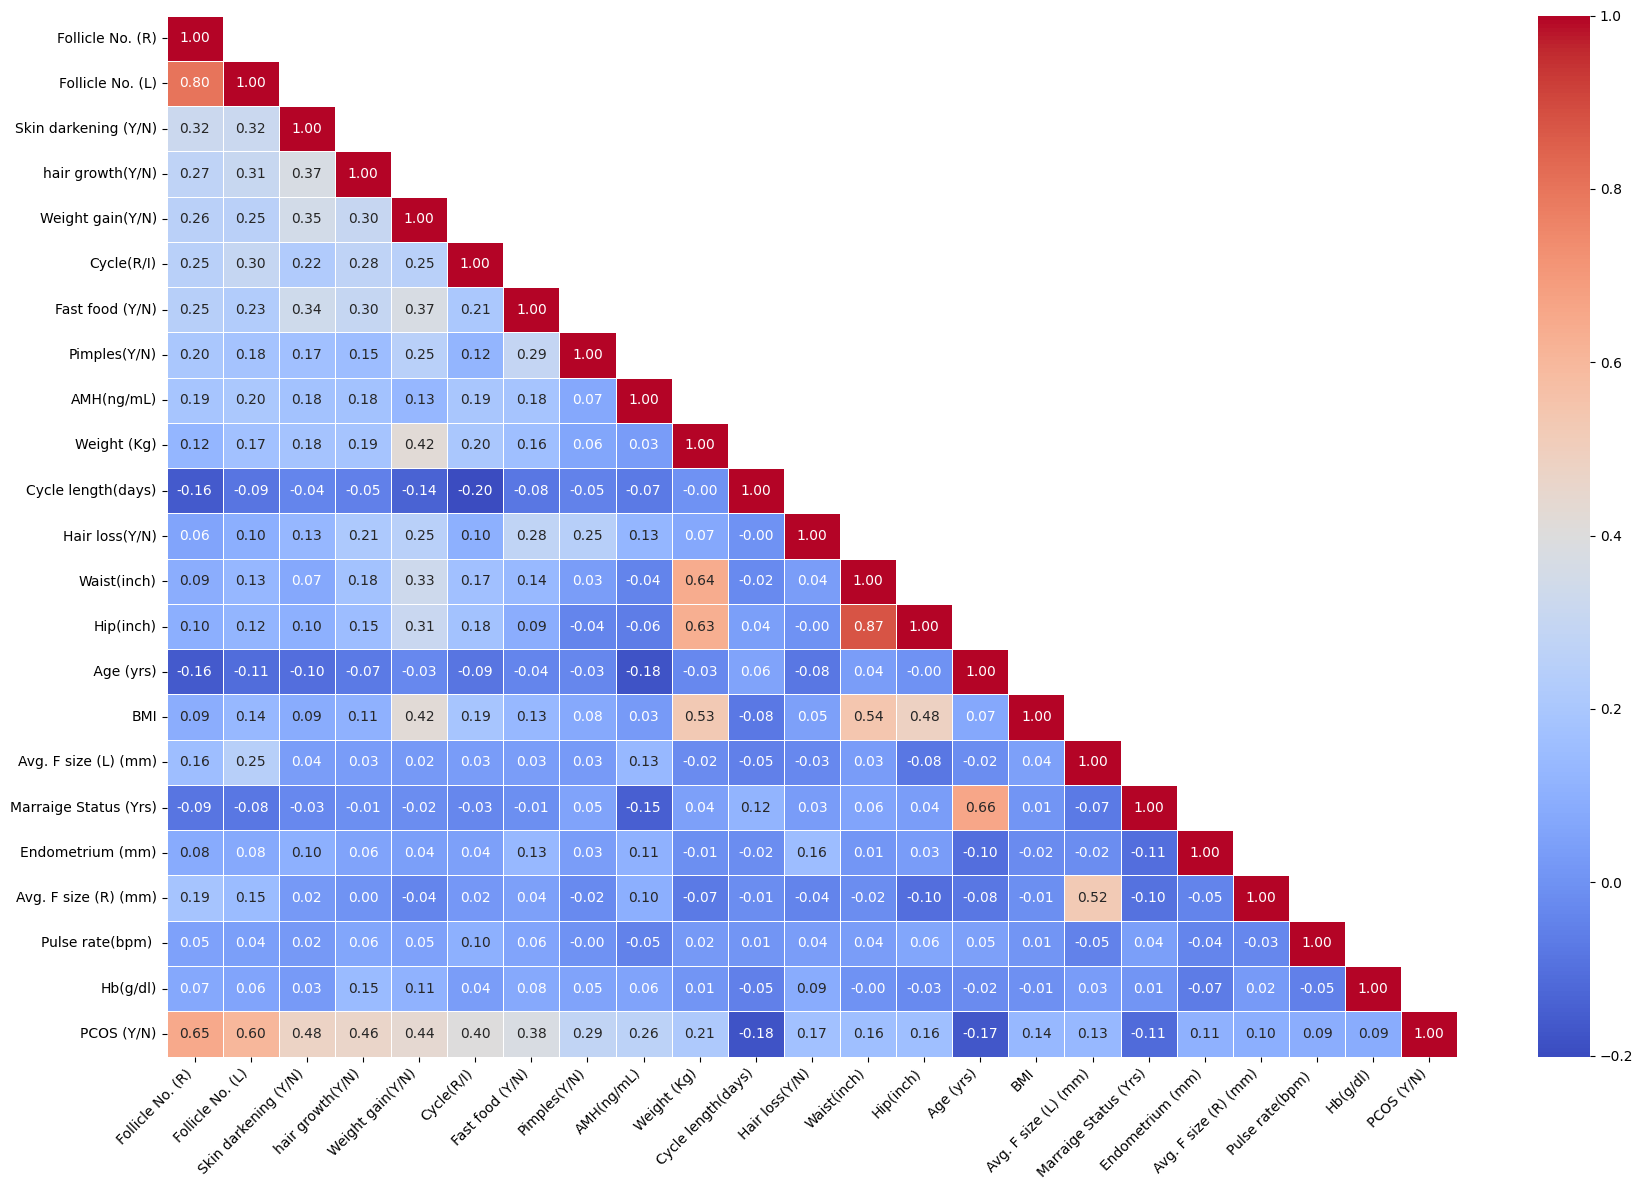

In [ ]:
# Step 4: Select High-Effect Columns (Corrected Names)
high_effect_cols = [
    'Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)',
    'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)',
    'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)', 'Weight (Kg)',
    'Cycle length(days)', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)',' Age (yrs)', 'BMI',
    'Avg. F size (L) (mm)',  'Marraige Status (Yrs)', 'Endometrium (mm)', 'Avg. F size (R) (mm)',
    'Pulse rate(bpm) ', 'Hb(g/dl)', 'PCOS (Y/N)'
]


df_high_effect = df[high_effect_cols].copy()  # Create a copy to avoid SettingWithCopyWarning

# Convert columns with potential non-numeric values to numeric
for col in high_effect_cols:
    try:
        df_high_effect[col] = pd.to_numeric(df_high_effect[col], errors='raise')  # Convert to numeric, raise error if fails
    except ValueError:
        # Handle non-numeric values (e.g., replace with NaN or mode)
        # print(f"Column '{col}' contains non-numeric values. Replacing with NaN.")
        # df_high_effect[col] = pd.to_numeric(df_high_effect[col], errors='coerce')  # Replace non-numeric with NaN
        # df_high_effect[col].fillna(df_high_effect[col].mode()[0], inplace=True)  # Replace NaN with mode
        # Alternatively, investigate the non-numeric values and apply appropriate cleaning
        print(f"Column '{col}' has non-numeric values: {df_high_effect[col].unique()}")
        # Example: Replace 'a' with a specific numeric value or handle based on your understanding of the data
        df_high_effect[col] = df_high_effect[col].replace('a', 0)  # Replace 'a' with 0


# Step 5: Compute Correlation Matrix
correlation_matrix = df_high_effect.corr()

# Step 6: Generate Heatmap (Adjusted Mask)
plt.figure(figsize=(18, 12))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    annot_kws={'size': 10},
    mask=np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)  # Keep diagonal
)
#plt.title('Correlation Heatmap:PCOS (Y/N) vs others attribute', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()